In [1]:
# Importo las librerias a utilizar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargo el conjunto de puntos en memoria
dataset__route = "data/boxes2.csv"
dataset_df = pd.read_csv(dataset__route)

# Muestro los primeros 5 registros del conjunto de puntos
dataset_df.head()

x           y  color
0  490.127172  115.109548      1
1  294.267870  158.581321      0
2  440.425055  203.140844      2
3  494.372290  112.077622      1
4  316.361087  238.759800      1

In [4]:
# Normalizo los valores de x e y del conjunto de datos

## Instancio un objeto de la clase MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_df[['x', 'y']])
X

array([[0.89758378, 0.11705475],
       [0.0403919 , 0.32038339],
       [0.680059  , 0.52879972],
       ...,
       [0.79796598, 0.19529133],
       [0.29425248, 0.06859449],
       [0.42767538, 0.1994751 ]])

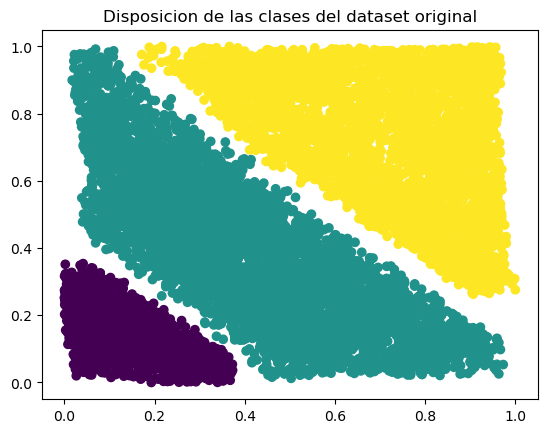

In [5]:
# Represento el conjunto de puntos en un eje bidimensional
plt.figure()

plt.scatter(X[:, 0], X[:, 1], c = dataset_df['color'])
plt.title("Disposicion de las clases del dataset original")
plt.show()

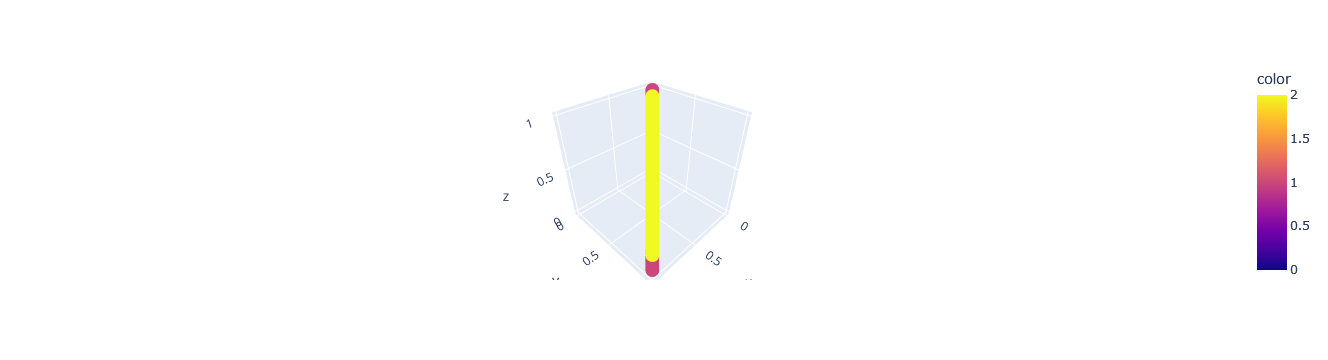

In [6]:
# Represento el conjunto de puntos en un eje tridimensional
fig = px.scatter_3d(X, X[:, 0], X[:, 0], X[:, 1], color = dataset_df['color'])
fig.show()

In [108]:
# Instancio un objeto de la clase DBSCAN de Sklearn.cluster
from sklearn.cluster import DBSCAN

eps = 0.02
model = DBSCAN(eps= eps)

# Entreno el modelo
model.fit(X)

DBSCAN(eps=0.02)

In [109]:
# Defino una lista con las etiquetas que el modelo ha asignado a cada uno de los puntos del dataset
labels = model.labels_

In [110]:
labels

array([0, 1, 2, ..., 0, 1, 0], dtype=int64)

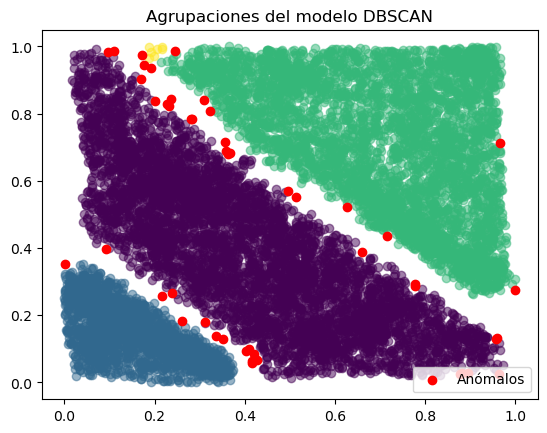

In [111]:
# Represento las agrupaciones del modelo DBSCAN en un eje bidimensional

cmap = plt.cm.viridis
unique_labels = np.unique(labels[labels != -1])
colors = cmap(np.linspace(0, 1, len(unique_labels)))

plt.figure()

# Itero sobre cada etiqueta única (excluyendo anómalos) para dibujar los puntos
for k, col in zip(unique_labels, colors):
    plt.scatter(X[labels == k][:, 0], X[labels == k][:, 1], c=[col], alpha=0.5)

# Muestro los datos anómalos
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c="red", label="Anómalos")

plt.title("Agrupaciones del modelo DBSCAN")
plt.legend()
plt.show()

En este caso, bajo la suposicion de trabajo del algoritmo DBSCAN, existen algunos puntos, considerados como anomalos, que el modelo no lograr clasificar. No obstante, el conteo total de estos anomalos, en correspondencia con el numero de puntos que se han clasificado correctamente (en diferentes clusters, siendo un total de 3), es una cantidad infima.

Para el caso de este entrenamiento, se recomendaria entrenar diferentes modelos, variando el valor de los parametros 'eps' y 'min_samples', para luego quedarnos con el model que menos datos anomalos clasifica.

Es muy probable que un valor demasiado algo de este primer parametro, provoque, debido a la normalizacion efectuada a los valores de los datos, la generacion de un unico cluster. Por el contrario, un valor demasiado bajo de este, puede ocasionar tantos clusters como puntos existan en el conjunto de datos, por lo que es vital realizar varios entrenamiento y quedarnos con un modelo cuyo valor para este parametro se ajuste mejor a nuestros datos.

## UPDATE ================

Tras varios ajustes del parametro 'eps', he logrado reducir considerablemente el numero de puntos considerados anomalos, y corregido un error que el modelo presenciaba al clasificar, pues detectaba 4 diferentes clusters en los que dividir las nubes de puntos.

El modelo ***DBSCAN***, con parametro **'eps' = 0.029**, ha logrado el rendimiento de clustering que se puede apreciar en la siguiente imagen:

![Imagen](data/boxes2_dbscan.png)